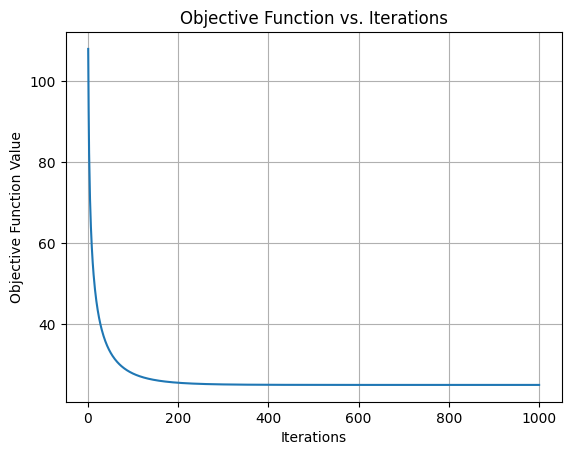

In [28]:
import numpy as np
from scipy.optimize import minimize_scalar

def objective_function(x):
    return (x[0] + 5)**2 + (x[1] + 8)**2 + (x[2] + 7)**2 + 2 * x[0]**2 * x[1]**2 + 4 * x[0]**2 * x[2]**2

def gradient(x):
    df_dx1 = 2 * (x[0] + 5) + 4 * x[0] * x[1]**2 + 8 * x[0] * x[2]**2
    df_dx2 = 2 * (x[1] + 8) + 4 * x[0]**2 * x[1]
    df_dx3 = 2 * (x[2] + 7) + 8 * x[0]**2 * x[2]
    return np.array([df_dx1, df_dx2, df_dx3])

def hessian(x):
    d2f_dx1dx1 = 2 + 4 * x[1]**2 + 8 * x[2]**2
    d2f_dx1dx2 = 8 * x[0] * x[1]
    d2f_dx1dx3 = 16 * x[0] * x[2]
    d2f_dx2dx2 = 2 + 4 * x[0]**2
    d2f_dx2dx3 = 0
    d2f_dx3dx3 = 2 + 8 * x[0]**2
    return np.array([[d2f_dx1dx1, d2f_dx1dx2, d2f_dx1dx3], 
                     [d2f_dx1dx2, d2f_dx2dx2, d2f_dx2dx3],
                     [d2f_dx1dx3, d2f_dx2dx3, d2f_dx3dx3]])

def steepest_descent(x0, threshold, max_iter=1000):
    x = x0
    values = []
    for i in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < threshold:
            break
        line_search_func = lambda alpha: objective_function(x - alpha * grad)
        alpha = minimize_scalar(line_search_func).x
        x = x - alpha * grad
        values.append(objective_function(x))
    return x, values

# Initial values
x0 = np.array([1, 1, 1])
threshold = 1e-6

# Run the steepest descent algorithm
final_x, values = steepest_descent(x0, threshold)

# Check if Hessian matrix at final x is positive definite
hessian_matrix = hessian(final_x)
eigenvalues = np.linalg.eigvals(hessian_matrix)
is_positive_definite = np.all(eigenvalues > 0)

final_x, eigenvalues, is_positive_definite, values[:10]  # Show first 10 values for brevity

import matplotlib.pyplot as plt

# Plotting the objective function values against the number of iterations
iterations = list(range(1, len(values) + 1))
plt.plot(iterations, values)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Objective Function vs. Iterations')
plt.grid(True)
plt.show()

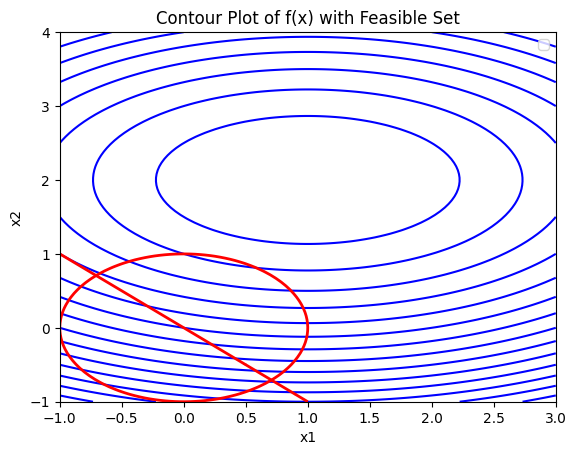

Optimal Solution:
[0.31381756 0.79114852]


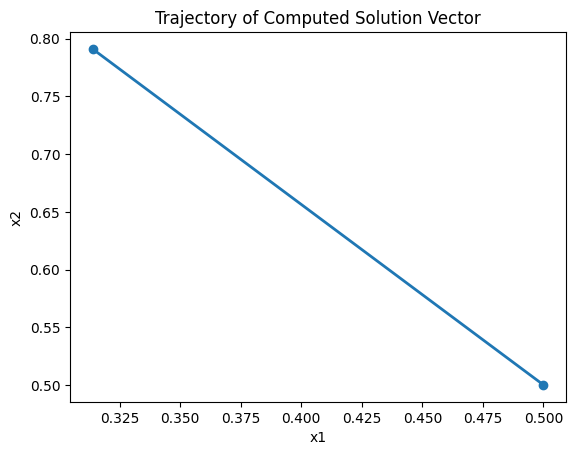

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the objective function
def f(x):
    return (x[0] - 1)**2 + 2 * (x[1] - 2)**2

# Define the constraint function
def h(x):
    return np.array([1 - x[0]**2 - x[1]**2, x[0] + x[1]])

# (a) Plot the contour of f(x) and the feasible set
x1 = np.linspace(-1, 3, 100)
x2 = np.linspace(-1, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
f_values = (x1 - 1)**2 + 2 * (x2 - 2)**2

plt.figure()
plt.contour(x1, x2, f_values, 20, colors='b', linewidths=1.5)

# Plot the feasible set
h_values = [1 - x1**2 - x2**2, x1 + x2]
plt.contour(x1, x2, h_values[0], levels=[0], colors='r', linewidths=2)
plt.contour(x1, x2, h_values[1], levels=[0], colors='r', linewidths=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of f(x) with Feasible Set')
plt.legend(['f(x)', 'Feasible Set'])
plt.show()

# (b) Find a solution using the natural logarithmic barrier function
def barrier(x, mu):
    return -np.sum(np.log(h(x))) - mu * np.sum(np.minimum(0, h(x))**2)

# Define parameters
x0 = np.array([0.5, 0.5])
mu = 1
threshold = 0.002

# Optimization using barrier method
trajectory = [x0]
mu_values = [mu]

while True:
    # Solve the optimization problem with the current mu
    result = minimize(lambda x: f(x) + barrier(x, mu), x0, method='Nelder-Mead')
    x = result.x
    
    # Update trajectory and mu values
    trajectory.append(x)
    mu_values.append(mu)
    
    # Check the stopping criterion
    if np.sum(np.minimum(0, h(x))**2) < threshold:
        break
    
    # Reduce the penalty parameter
    mu /= 2

print('Optimal Solution:')
print(x)

# (c) Plot the trajectory
trajectory = np.array(trajectory).T
plt.figure()
plt.plot(trajectory[0], trajectory[1], '-o', linewidth=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trajectory of Computed Solution Vector')
plt.show()

[*********************100%%**********************]  1 of 1 completed


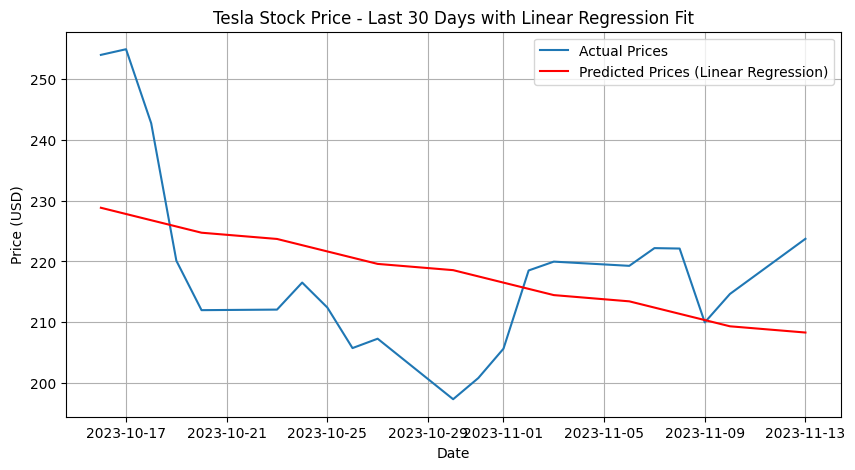

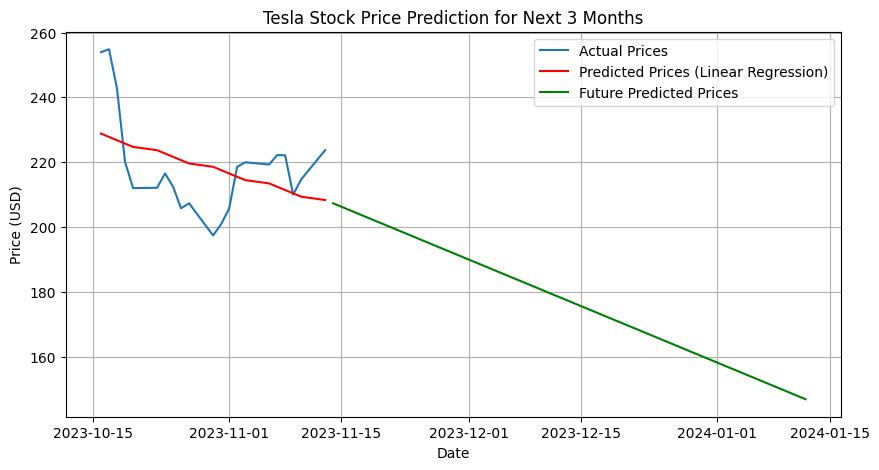

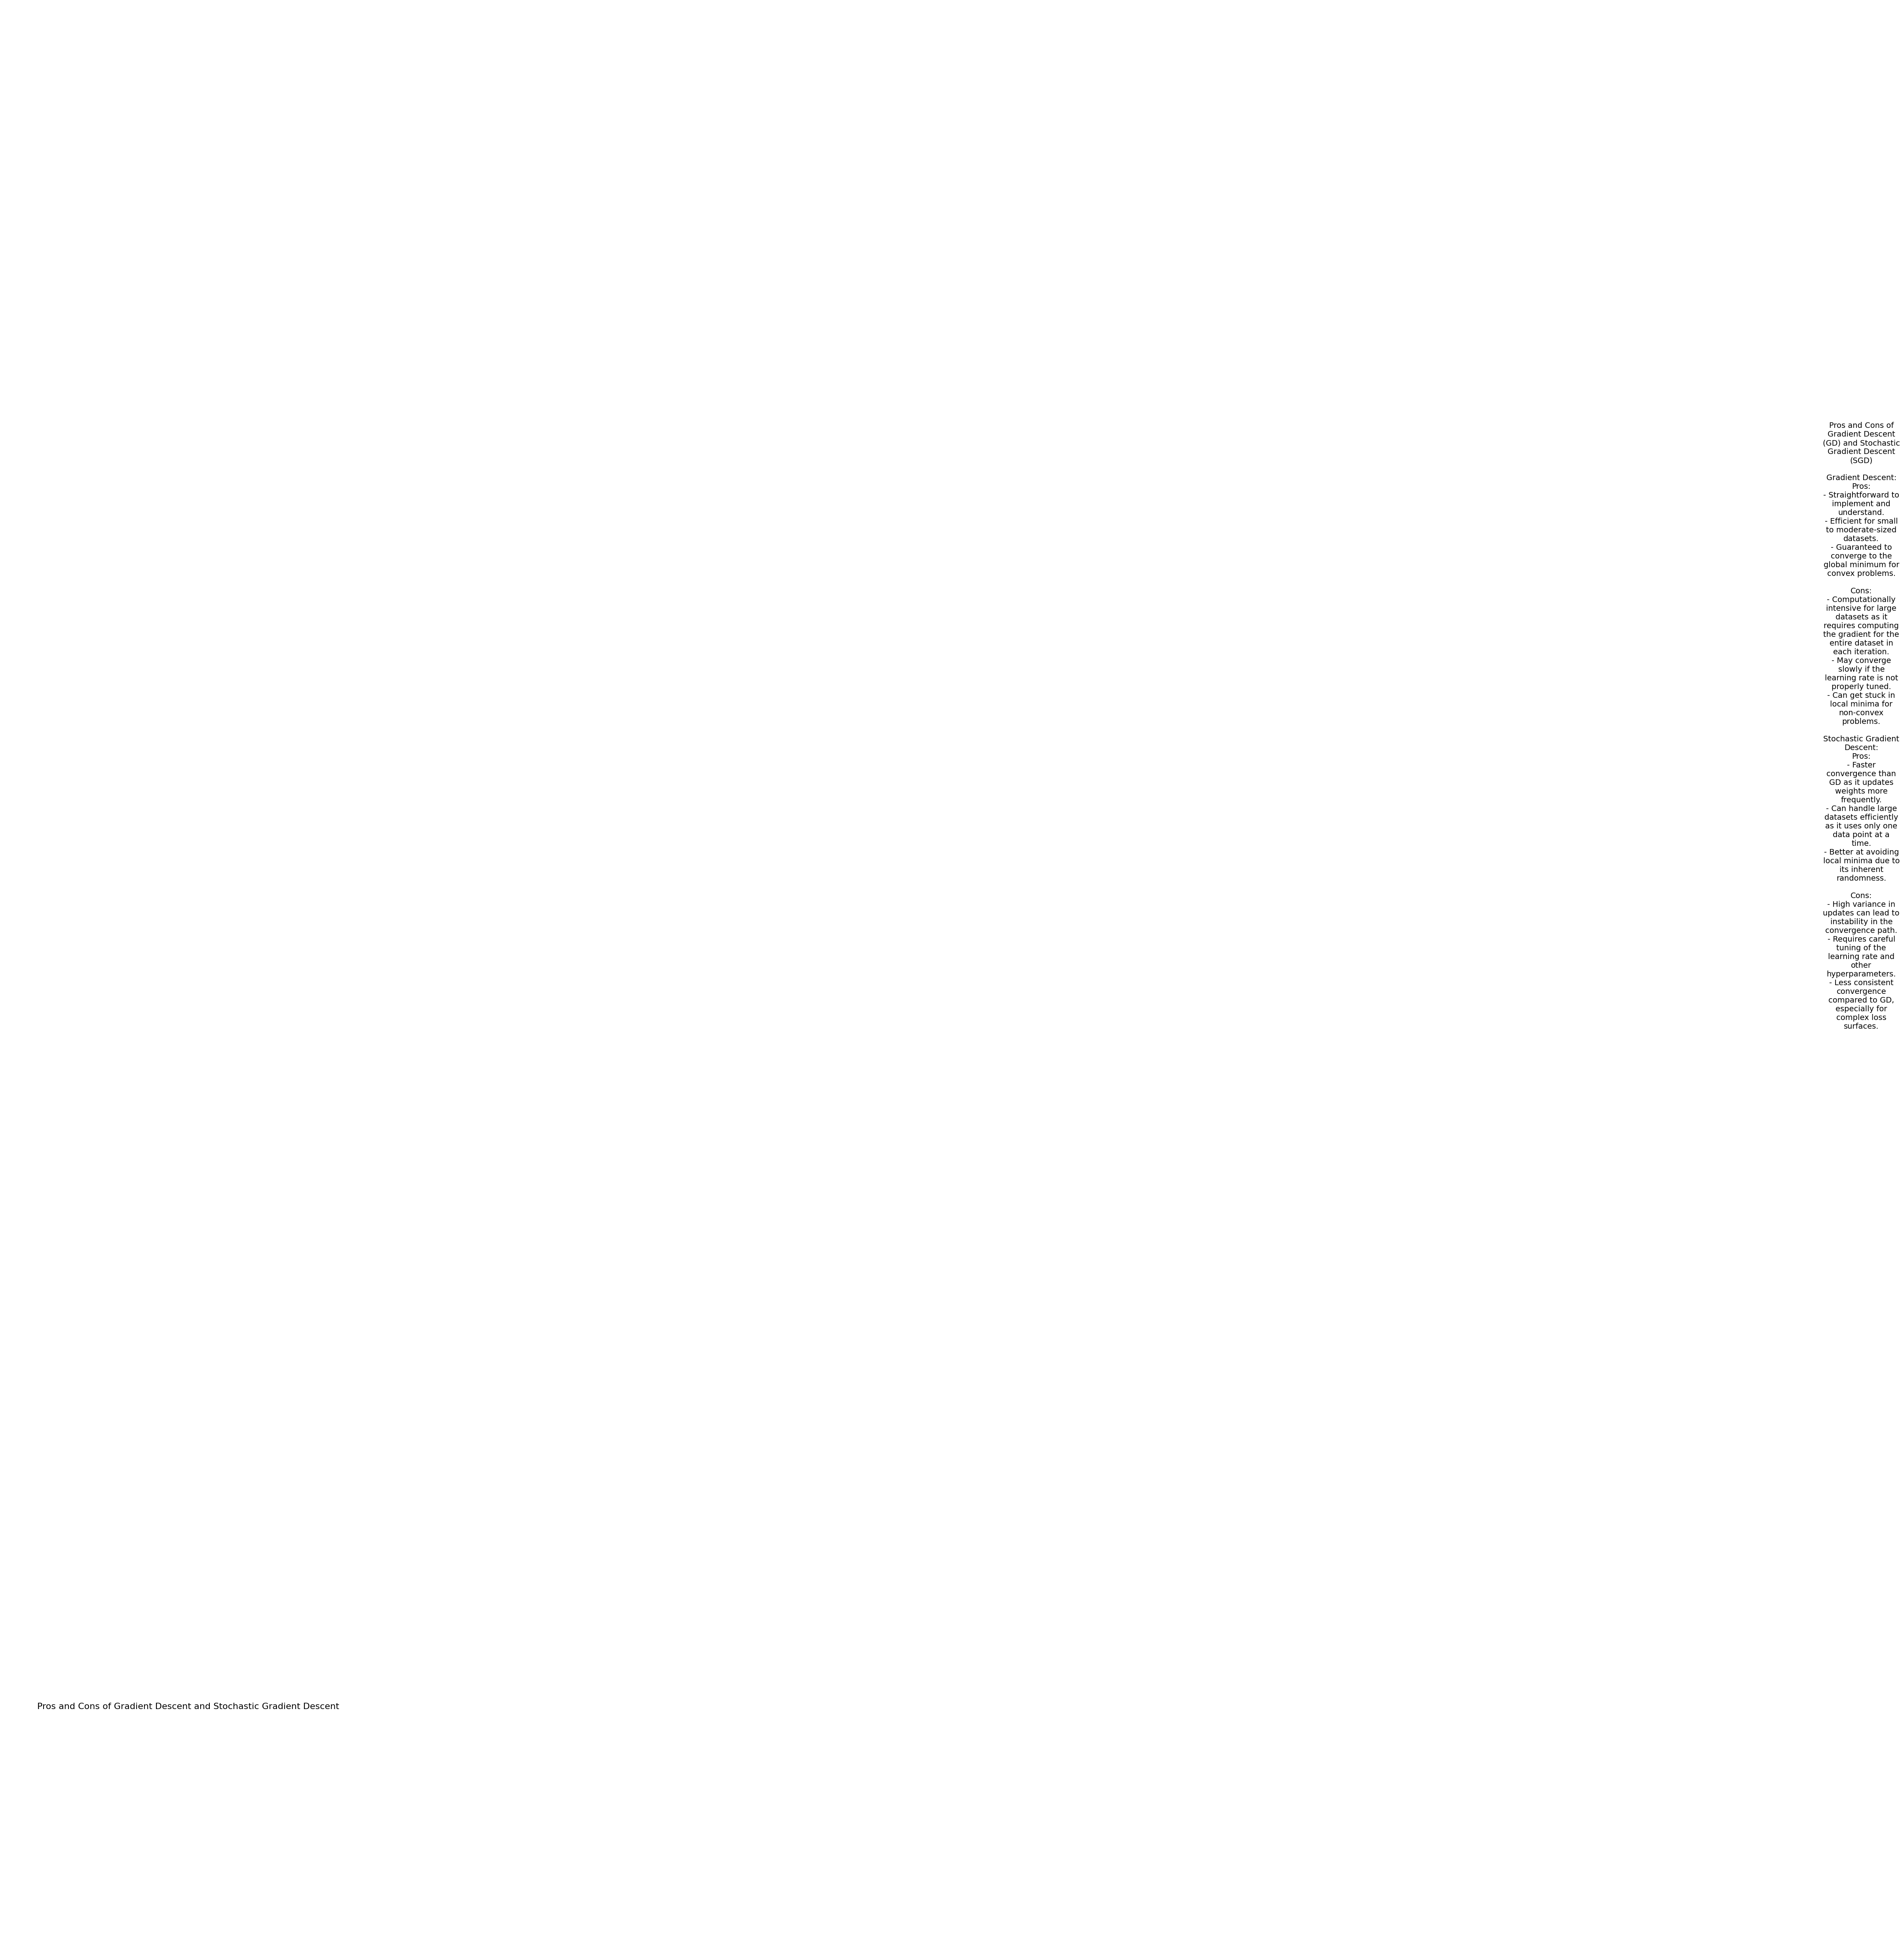

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import timedelta

# Fetch the stock data for Tesla for the past 30 days
ticker = "TSLA"
period = "1mo"  # approximately 30 days
interval = "1d"  # daily data

# Download the data
data = yf.download(ticker, period=period, interval=interval)

# Prepare data for linear regression
# We'll use days as our X (independent variable) and closing prices as Y (dependent variable)
X = np.arange(len(data)).reshape(-1, 1)
y = data['Close'].values

# Standardize the features (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the model using SGD
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_scaled, y)

# Make predictions
y_pred = model.predict(X_scaled)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index, y_pred, label='Predicted Prices (Linear Regression)', color='red')
plt.title('Tesla Stock Price - Last 30 Days with Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Prediction for the next three months
# Assuming ~20 trading days per month
future_days = 20 * 3
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=x) for x in range(1, future_days + 1)]

# Prepare future dates for prediction
X_future = np.arange(len(data), len(data) + future_days).reshape(-1, 1)
X_future_scaled = scaler.transform(X_future)  # Use the same scaler as before

# Predict future prices
y_future_pred = model.predict(X_future_scaled)

# Plotting the future predictions
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index, y_pred, label='Predicted Prices (Linear Regression)', color='red')
plt.plot(future_dates, y_future_pred, label='Future Predicted Prices', color='green')
plt.title('Tesla Stock Price Prediction for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(12, 8))

# Dummy plot (empty)
ax.plot()

# Text for pros and cons of Gradient Descent and Stochastic Gradient Descent
text_str = """
Pros and Cons of Gradient Descent (GD) and Stochastic Gradient Descent (SGD)

Gradient Descent:
Pros:
- Straightforward to implement and understand.
- Efficient for small to moderate-sized datasets.
- Guaranteed to converge to the global minimum for convex problems.

Cons:
- Computationally intensive for large datasets as it requires computing the gradient for the entire dataset in each iteration.
- May converge slowly if the learning rate is not properly tuned.
- Can get stuck in local minima for non-convex problems.

Stochastic Gradient Descent:
Pros:
- Faster convergence than GD as it updates weights more frequently.
- Can handle large datasets efficiently as it uses only one data point at a time.
- Better at avoiding local minima due to its inherent randomness.

Cons:
- High variance in updates can lead to instability in the convergence path.
- Requires careful tuning of the learning rate and other hyperparameters.
- Less consistent convergence compared to GD, especially for complex loss surfaces.
"""

# Adding the formatted text to the plot
ax.text(0.5, 0.5, text_str, horizontalalignment='center', verticalalignment='center', fontsize=14, wrap=True)

# Set plot title with larger font and hide axes
ax.set_title('Pros and Cons of Gradient Descent and Stochastic Gradient Descent', fontsize=16)
ax.axis('off')

plt.show()


Second-order necessary conditions satisfied: True


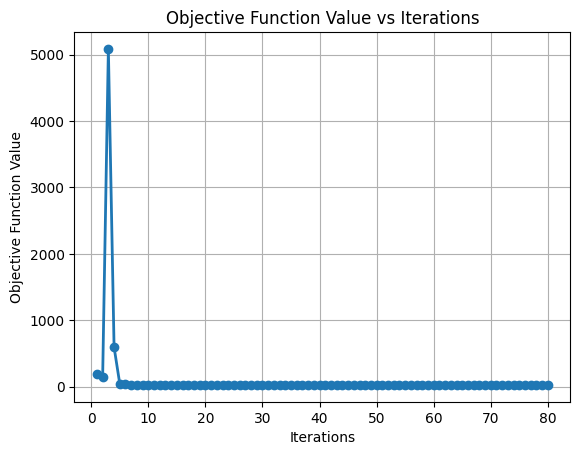

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its gradient
def f(x):
    return (x[0] + 5)**2 + (x[1] + 8)**2 + (x[2] + 7)**2 + 2*x[0]**2*x[1]**2 + 4*x[0]**2*x[2]**2

def grad_f(x):
    return np.array([2*(x[0] + 5) + 4*x[0]*x[1]**2 + 8*x[0]*x[2]**2,
                     2*(x[1] + 8) + 4*x[0]**2*x[1],
                     2*(x[2] + 7) + 8*x[0]**2*x[2]])

# Define the Hessian function
def Hessian(x):
    h11 = 2 + 4*x[1]**2 + 8*x[2]**2
    h12 = 8*x[0]*x[1]
    h13 = 16*x[0]*x[2]
    h22 = 2 + 4*x[0]**2
    h33 = 2 + 8*x[0]**2
    return np.array([[h11, h12, h13],
                     [h12, h22, 0],
                     [h13, 0, h33]])

# Steepest Descent Algorithm
x0 = np.array([1, 1, 1])
threshold = 1e-6
max_iterations = 1000

x = x0
obj_values = []
iterations = 0

while iterations < max_iterations:
    gradient_value = grad_f(x)
    
    # Update the objective function value before alpha calculation
    obj_values.append(f(x))

    alpha = np.dot(gradient_value, gradient_value) / np.dot(gradient_value, np.dot(Hessian(x), gradient_value))
    x = x - alpha * gradient_value

    if np.linalg.norm(gradient_value) < threshold:
        break

    iterations += 1

# Verify second-order necessary conditions
final_Hessian = Hessian(x)
is_positive_definite = np.all(np.linalg.eigvals(final_Hessian) > 0)
print(f'Second-order necessary conditions satisfied: {is_positive_definite}')

# Plot the objective function values with respect to the number of iterations
plt.plot(range(1, len(obj_values) + 1), obj_values, 'o-', linewidth=2)
plt.title('Objective Function Value vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()
